# iLab2

## Import Modules & Settings

In [60]:
import os
from glob import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Get FilePath & Load File

In [2]:
path = os.path.abspath(os.getcwd())

coles_event = glob(path + '/Cleaned_all*.csv')
df = pd.read_csv(coles_event[0], sep = ',', dtype = {'actorId': str})

actorid_map = glob(path + '/actorid_dict.csv')
df_id = pd.read_csv(actorid_map[0], sep = ',')

timezone_map = glob(path + '/timezone_dict.csv')
df_id = pd.read_csv(timezone_map[0], sep = ',')

## Data Exploration

In [3]:
df.head()

,actorId,verb,type,activity,ancestors,duration,completion,Is Manager,Is New Starter,Time Zone,timestamp,other,contained,rating,response
0,0,completed,event,activities,['activities'],0,1.0,1.0,0,0,2021-07-01T00:00:00Z,NaN,NaN,NaN,NaN
1,1,completed,event,activities,['activities'],0,1.0,1.0,0,0,2021-07-01T00:00:00Z,NaN,NaN,NaN,NaN
2,2,completed,event,activities,['activities'],0,1.0,1.0,0,0,2021-07-01T00:00:00Z,NaN,NaN,NaN,NaN
3,3,completed,event,activities,['activities'],0,1.0,1.0,0,1,2021-07-01T00:00:00Z,NaN,NaN,NaN,NaN
4,4,completed,event,activities,['activities'],0,1.0,1.0,0,0,2021-07-01T00:00:00Z,NaN,NaN,NaN,NaN


In [4]:
df.shape

(39185082, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39185082 entries, 0 to 39185081
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   actorId         object 
 1   verb            object 
 2   type            object 
 3   activity        object 
 4   ancestors       object 
 5   duration        int64  
 6   completion      float64
 7   Is Manager      float64
 8   Is New Starter  int64  
 9   Time Zone       int64  
 10  timestamp       object 
 11  other           object 
 12  contained       object 
 13  rating          float64
 14  response        object 
dtypes: float64(3), int64(3), object(9)
memory usage: 4.4+ GB


In [6]:
df.describe()

,duration,completion,Is Manager,Is New Starter,Time Zone,rating
count,3.918508e+07,3.872175e+07,3.913585e+07,3.918508e+07,3.918508e+07,1.874656e+06
mean,1.372283e+04,2.971697e-01,2.598383e-01,1.565861e-02,2.431955e+00,4.631024e+00
std,6.274242e+04,4.570119e-01,4.385457e-01,1.241508e-01,1.567393e+00,8.437878e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00
50%,8.840000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,5.000000e+00
75%,7.258000e+03,1.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,5.000000e+00
max,1.199992e+06,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00,5.000000e+00


In [7]:
df['actorId'].nunique()

174734

In [8]:
df['Is Manager'].value_counts()

0.0    28966856
1.0    10168990
Name: Is Manager, dtype: int64

In [9]:
df['Is New Starter'].value_counts()

0    38571498
1      613584
Name: Is New Starter, dtype: int64

In [10]:
df['verb'].value_counts()

experienced     11957012
completed        9924934
initialized      5287525
viewed           3444075
searched         3300243
rated            1888639
passed           1000058
selected          512770
launched          444627
registered        408785
terminated        250355
suspended         216091
removed           190053
assigned          159325
unregistered       60961
failed             57198
remove             33947
shared             21978
updated            11671
earned              8519
complete            4923
scored              1027
attempted            319
reset                 46
update                 1
Name: verb, dtype: int64

## Data Cleansing

In [11]:
df_staff = df[df['Is Manager'] == 0]
df_manager = df[df['Is Manager'] == 1]

### Staff

### Filter out staff data

In [12]:
df_staff_verb = df_staff[['actorId', 'verb']]

In [15]:
# replace 'complete' by 'completed'
df_staff_verb = df_staff_verb.replace(to_replace = 'complete', value = 'completed')

# replace 'remove' by 'removed'
df_staff_verb = df_staff_verb.replace(to_replace = 'remove', value = 'removed')

In [22]:
df_staff_verb['actorId'].nunique()

165768

In [21]:
df_staff_verb['verb'].value_counts()

completed       8076915
experienced     7017952
initialized     3924408
viewed          2765888
searched        2640282
rated           1656645
passed           935444
selected         448689
launched         383749
registered       347497
terminated       235545
suspended        192377
removed          190107
failed            54114
unregistered      46799
assigned          24988
updated           10401
earned             7314
shared             6758
scored              668
attempted           269
reset                46
update                1
Name: verb, dtype: int64

### Validate & Select valid verbs

In [26]:
# verb count
vc = df_staff_verb['verb'].value_counts()

# select verb frequency over 1000 and convert to list
vc_list = vc[vc > 1000].index.tolist()

# filter data by verb list
df_staff_filtered = df_staff_verb[df_staff_verb['verb'].isin(vc_list)]

In [28]:
df_staff_filtered['verb'].value_counts()

completed       8076915
experienced     7017952
initialized     3924408
viewed          2765888
searched        2640282
rated           1656645
passed           935444
selected         448689
launched         383749
registered       347497
terminated       235545
suspended        192377
removed          190107
failed            54114
unregistered      46799
assigned          24988
updated           10401
Name: verb, dtype: int64

In [33]:
df_staff_new = df_staff_filtered
df_staff_new['occurence'] = 1
df_staff_new

<ipython-input-33-b84b3c36992f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_staff_new['occurence'] = 1


,actorId,verb,occurence
10,10,completed,1
19,18,completed,1
20,19,completed,1
22,21,initialized,1
23,21,experienced,1
...,...,...,...
39185074,72256,rated,1
39185076,15859,completed,1
39185077,72205,experienced,1
39185078,72205,initialized,1


### Clean & Prep the DataFrame

In [47]:
# generate pivot table
df_staff_pivot = pd.pivot_table(df_staff_new, values = 'occurence', index = 'actorId', columns = 'verb', aggfunc = 'count')

# convert pivot table to dataframe
df_staff_pivot = df_staff_pivot.reset_index()

# remove index header
df_staff_pivot = df_staff_pivot.rename_axis(None, axis = 1)

# replace NaN with 0 for an entire dataframe
df_staff_pivot = df_staff_pivot.replace(np.nan, 0) # df_staff_pivot.fillna(0)

df_staff_pivot

,actorId,assigned,completed,experienced,failed,initialized,launched,passed,rated,registered,removed,searched,selected,suspended,terminated,unregistered,updated,viewed
0,10,0.0,7.0,48.0,0.0,20.0,9.0,2.0,0.0,3.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,15.0
1,100,2.0,397.0,1156.0,0.0,256.0,8.0,2.0,65.0,6.0,1.0,89.0,0.0,1.0,0.0,1.0,1.0,89.0
2,1000,0.0,28.0,60.0,0.0,46.0,8.0,10.0,1.0,3.0,2.0,46.0,5.0,1.0,0.0,0.0,0.0,48.0
3,10000,0.0,28.0,19.0,0.0,14.0,0.0,1.0,3.0,3.0,2.0,15.0,6.0,0.0,0.0,0.0,0.0,19.0
4,100000,0.0,28.0,16.0,0.0,13.0,3.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165736,99995,0.0,23.0,17.0,0.0,9.0,6.0,2.0,0.0,0.0,1.0,6.0,0.0,2.0,0.0,0.0,0.0,6.0
165737,99996,0.0,16.0,4.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
165738,99997,0.0,16.0,4.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0
165739,99998,0.0,28.0,9.0,0.0,9.0,0.0,1.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# generate dataframe without actorId
df_staff_noid = df_staff_pivot.loc[:, df_staff_pivot.columns != 'actorId']

# create scaled DataFrame where each variable has mean of 0 and standard dev of 1
df_staff_scaled = StandardScaler().fit_transform(df_staff_noid)

df_staff_scaled

array([[-0.02699163, -0.85174753,  0.08229786, ..., -0.09860827,
        -0.15859482, -0.05264874],
       [ 0.33106978,  7.10809994, 16.20111747, ...,  0.25061786,
         2.36862994,  2.25539417],
       [-0.02699163, -0.42314035,  0.25686991, ..., -0.09860827,
        -0.15859482,  0.97661364],
       ...,
       [-0.02699163, -0.66805874, -0.55779967, ..., -0.09860827,
        -0.15859482, -0.45811574],
       [-0.02699163, -0.42314035, -0.48506132, ..., -0.09860827,
        -0.15859482, -0.52049528],
       [-0.02699163, -0.46396009, -0.39777529, ..., -0.09860827,
        -0.15859482, -0.45811574]])

### Find the Optimal Number of Clusters

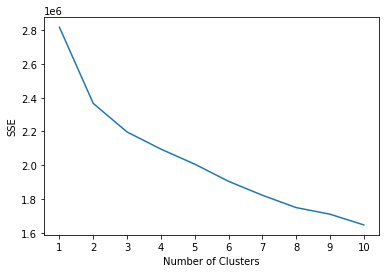

In [62]:
# initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

# create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(df_staff_scaled)
    sse.append(kmeans.inertia_)

# visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

* No elbow in for K-means does not mean that there are no clusters in the data;
* No elbow means that the algorithm used cannot separate clusters; (think about K-means for concentric circles, vs DBSCAN)


Generally, you may consider:
* tune your algorithm;
* use another algorithm;
* do data preprocessing.

In this plot it appears that there is an elbow or “bend” at k = 2 or k = 3 clusters. Thus, we will use 3 clusters when fitting our k-means clustering model in the next step.

In [61]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

ModuleNotFoundError: No module named 'yellowbrick'

### Perform K-Means Clustering with Optimal K

In [63]:
# instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init = "random", n_clusters = 3, n_init = 10, random_state = 1)

# fit k-means algorithm to data
kmeans.fit(df_staff_scaled)

# view cluster assignments for each observation
kmeans.labels_

array([1, 0, 2, ..., 1, 1, 1])

In [64]:
#append cluster assingments to original DataFrame
df_staff_cat = df_staff_pivot
df_staff_cat['cluster'] = kmeans.labels_

In [65]:
df_staff_cat

,actorId,assigned,completed,experienced,failed,initialized,launched,passed,rated,registered,removed,searched,selected,suspended,terminated,unregistered,updated,viewed,cluster
0,10,0.0,7.0,48.0,0.0,20.0,9.0,2.0,0.0,3.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,15.0,1
1,100,2.0,397.0,1156.0,0.0,256.0,8.0,2.0,65.0,6.0,1.0,89.0,0.0,1.0,0.0,1.0,1.0,89.0,0
2,1000,0.0,28.0,60.0,0.0,46.0,8.0,10.0,1.0,3.0,2.0,46.0,5.0,1.0,0.0,0.0,0.0,48.0,2
3,10000,0.0,28.0,19.0,0.0,14.0,0.0,1.0,3.0,3.0,2.0,15.0,6.0,0.0,0.0,0.0,0.0,19.0,1
4,100000,0.0,28.0,16.0,0.0,13.0,3.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165736,99995,0.0,23.0,17.0,0.0,9.0,6.0,2.0,0.0,0.0,1.0,6.0,0.0,2.0,0.0,0.0,0.0,6.0,1
165737,99996,0.0,16.0,4.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
165738,99997,0.0,16.0,4.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0,1
165739,99998,0.0,28.0,9.0,0.0,9.0,0.0,1.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [67]:
df_staff_c0 = df_staff_cat[df_staff_cat['cluster'] == 0]
df_staff_c1 = df_staff_cat[df_staff_cat['cluster'] == 1]
df_staff_c2 = df_staff_cat[df_staff_cat['cluster'] == 2]

In [68]:
df_staff_c0.describe()

,assigned,completed,experienced,failed,initialized,launched,passed,rated,registered,removed,searched,selected,suspended,terminated,unregistered,updated,viewed,cluster
count,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.0
mean,5.756899,173.836005,270.563206,1.387911,117.568988,16.822076,19.675427,30.998160,15.136662,2.196058,135.859921,30.079369,6.854928,2.896189,3.370565,0.226018,143.372930,0.0
std,36.111618,121.991660,282.921068,4.466826,98.583780,21.003558,26.209974,39.611882,18.854045,4.385587,93.356964,47.885669,12.971921,6.567053,17.638184,0.881762,92.718245,0.0
min,0.000000,0.000000,12.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,83.000000,113.000000,0.000000,59.000000,6.000000,4.000000,2.000000,7.000000,1.000000,73.000000,1.000000,0.000000,0.000000,0.000000,0.000000,82.000000,0.0
50%,0.000000,148.000000,184.000000,0.000000,94.000000,11.000000,12.000000,16.000000,11.000000,2.000000,119.000000,12.000000,1.000000,1.000000,1.000000,0.000000,125.000000,0.0
75%,0.000000,228.000000,324.000000,1.000000,147.000000,19.000000,25.000000,46.000000,18.000000,2.000000,179.000000,37.000000,7.000000,3.000000,3.000000,0.000000,183.000000,0.0
max,1546.000000,930.000000,4200.000000,145.000000,1878.000000,233.000000,429.000000,304.000000,726.000000,99.000000,1077.000000,516.000000,189.000000,145.000000,967.000000,19.000000,1100.000000,0.0


In [75]:
df_staff_c1.describe()

,assigned,completed,experienced,failed,initialized,launched,passed,rated,registered,removed,searched,selected,suspended,terminated,unregistered,updated,viewed,cluster
count,124278.0000,124278.000000,124278.000000,124278.000000,124278.000000,124278.000000,124278.000000,124278.000000,124278.000000,124278.000000,124278.000000,124278.000000,124278.000000,124278.000000,124278.000000,124278.000000,124278.000000,124278.0
mean,0.0049,32.240485,23.259121,0.110752,14.105127,1.034946,3.023061,6.204203,1.005922,1.014789,7.303159,0.997216,0.382039,1.003058,0.110213,0.024027,7.594619,1.0
std,0.3818,23.847673,19.749339,0.463456,11.055907,1.934198,3.641661,8.532929,1.663520,0.709902,11.615665,3.553736,1.041423,1.663228,0.583352,0.189785,11.815741,0.0
min,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.0000,15.000000,9.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,0.0000,28.000000,18.000000,0.000000,12.000000,0.000000,2.000000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.0
75%,0.0000,42.000000,31.000000,0.000000,19.000000,1.000000,4.000000,9.000000,1.000000,1.000000,10.000000,0.000000,0.000000,2.000000,0.000000,0.000000,11.000000,1.0
max,106.0000,208.000000,273.000000,11.000000,132.000000,35.000000,68.000000,78.000000,32.000000,15.000000,128.000000,90.000000,18.000000,27.000000,25.000000,5.000000,129.000000,1.0


In [76]:
df_staff_c2.describe()

,assigned,completed,experienced,failed,initialized,launched,passed,rated,registered,removed,searched,selected,suspended,terminated,unregistered,updated,viewed,cluster
count,37658.000000,37658.000000,37658.000000,37658.000000,37658.000000,37658.000000,37658.000000,37658.000000,37658.000000,37658.000000,37658.000000,37658.000000,37658.000000,37658.000000,37658.000000,37658.000000,37658.000000,37658.0
mean,0.065697,90.516915,82.263052,0.931250,45.783127,5.075150,12.875856,20.384805,4.378565,1.477375,32.282994,5.584604,3.155106,2.651946,0.538451,0.174067,33.897445,2.0
std,1.361299,54.411304,58.011956,2.200345,30.675091,5.530054,14.482269,23.945267,4.429132,0.751082,31.386635,11.607716,6.008582,3.907266,1.552926,0.686788,31.693842,0.0
min,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,0.000000,52.000000,45.000000,0.000000,25.000000,1.000000,5.000000,2.000000,1.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,2.0
50%,0.000000,76.000000,67.000000,0.000000,37.000000,4.000000,10.000000,13.000000,3.000000,1.000000,24.000000,0.000000,1.000000,2.000000,0.000000,0.000000,26.000000,2.0
75%,0.000000,115.000000,101.000000,1.000000,57.000000,7.000000,16.000000,31.000000,6.000000,2.000000,48.000000,6.000000,3.000000,3.000000,0.000000,0.000000,50.000000,2.0
max,99.000000,692.000000,755.000000,83.000000,355.000000,80.000000,359.000000,215.000000,48.000000,53.000000,213.000000,149.000000,64.000000,74.000000,41.000000,19.000000,213.000000,2.0


In [74]:
import matplotlib.pyplot as plt

for column in df:
    plt.figure()
    df.boxplot([column])

ImportError: cannot import name 'ABCIndex' from 'pandas.core.dtypes.generic' (C:\Users\lche5\anaconda3\lib\site-packages\pandas\core\dtypes\generic.py)